<a href="https://colab.research.google.com/github/sanu4satyam/Customer_Segmentation_Unsupervised_ML/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Customer Segmentation for Matrketing Analytics**

**Objective:** *To Segment the Customers visiting Mall according to their Past Behaviors.*

Customer segmentation is a process of identifying and describing the different types of customers that exist within a given population. The objective of customer segmentation is to understand each group's needs and behaviors, and to optimize business operations by tailoring the product or service offerings to meet those needs.

The most common technique used to segment customers is clustering. Clustering is a method of grouping customer data so that similar customers are grouped together, while dissimilar ones are placed into separate clusters. K-Means Clustering is an advanced form of clustering, which uses a mathematical model to cluster the data points based on their distance from each other.

<img src="https://www.qualitygurus.com/wp-content/uploads/2022/09/Customer-Segmentation.jpg" alt="Customer Segmentation">

**Loading the Libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Reading the Dataset**

In [ ]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Shape of the Dataset**

In [ ]:
df.shape

(200, 5)

**Sample of the Datset**

In [ ]:
df.sample(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
115,116,Female,19,65,50
54,55,Female,50,43,45
180,181,Female,37,97,32
162,163,Male,19,81,5
22,23,Female,46,25,5
76,77,Female,45,54,53
172,173,Male,36,87,10
41,42,Male,24,38,92
98,99,Male,48,61,42
72,73,Female,60,50,49


## **Exploratory Data Analysis (EDA)**

**Checking Missing Values**

In [ ]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

*We have no missing Values in the DataSet.*

**Pairwise relationship between Variables of the Dataset**

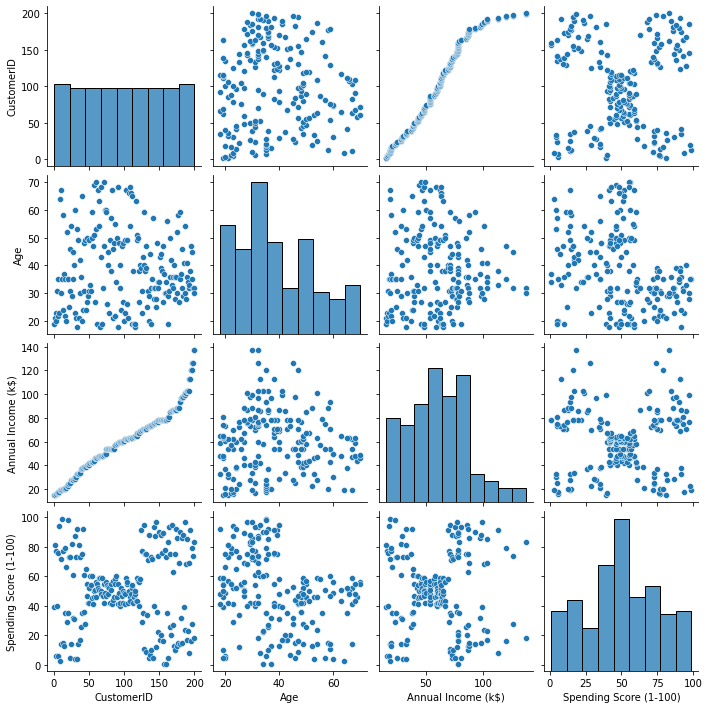

In [ ]:
sns.pairplot(df)
plt.show()

**Correlation**

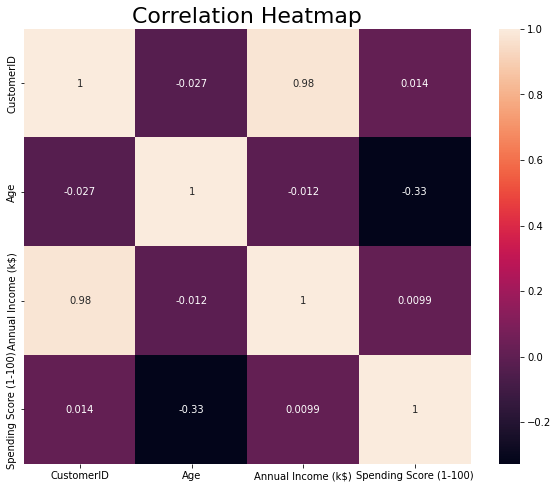

In [ ]:
correlation = df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation, annot=True)
plt.title("Correlation Heatmap", fontsize = 22)
plt.show()

*No multicolinearity as per the Correlation*

**Analyzing the data with respect to "Spending Score"**

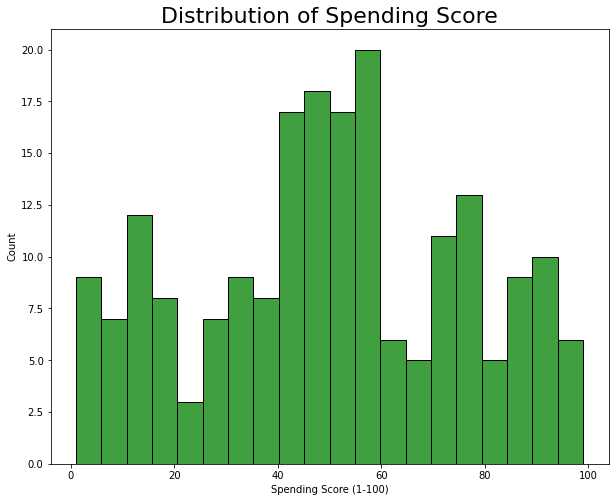

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Spending Score (1-100)'], bins= 20, color='g')
plt.title("Distribution of Spending Score", fontsize = 22)
plt.show()

*Customers have high spending score between 40 to 60*

**Distribution of Spending Score with respect to Age**

<Figure size 864x720 with 0 Axes>

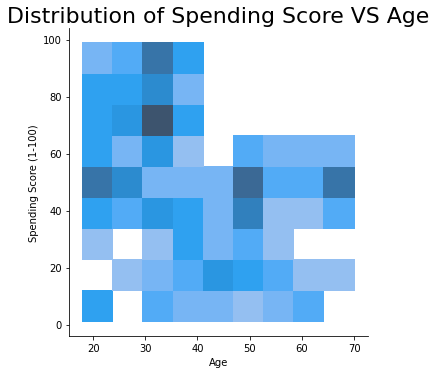

In [ ]:
plt.figure(figsize=(12,10))
sns.displot(data= df,y='Spending Score (1-100)',x='Age')
plt.title("Distribution of Spending Score VS Age", fontsize = 22)
plt.show()

*The Age of Customer from 20 to 40 have high Spending Score*

**Distribution of Spending Score with respect to Annual Income**

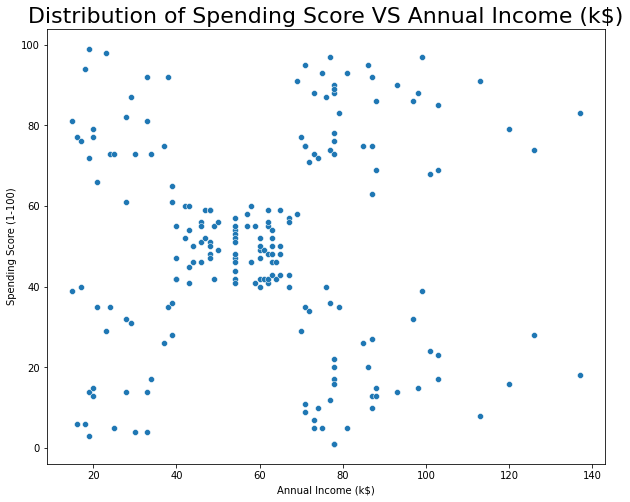

In [ ]:
plt.figure(figsize=(10,8))
sns.scatterplot(data= df,y='Spending Score (1-100)',x='Annual Income (k$)')
plt.title("Distribution of Spending Score VS Annual Income (k$)", fontsize = 22)
plt.show()

*Customers having Annual Income range 20k to 40k and 80k to 100k have higher Spending Score. And a big chunk of customers are around ~50k income with ~50 Spending Score*

**Analyzing the data with respect to "Annual Income"**

**Distribution of Annual Income**

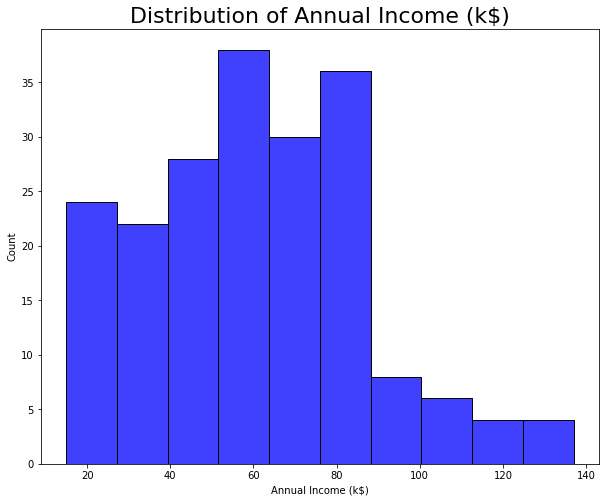

In [ ]:
plt.figure(figsize=(10,8))
sns.histplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income (k$)", fontsize = 22)
plt.show()

*Most customers visiting Mall have Annual Income of 50k to 80k.*

**Distributuion Annual Income with respect to Age**

<Figure size 864x720 with 0 Axes>

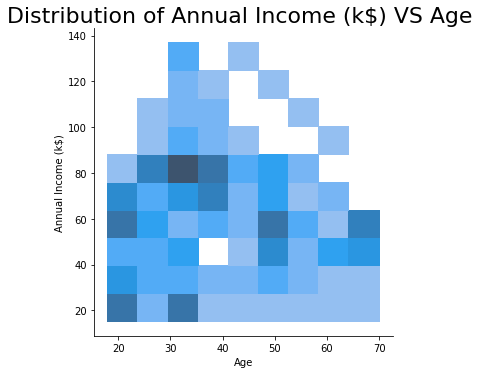

In [ ]:
plt.figure(figsize=(12,10))
sns.displot(data= df,y='Annual Income (k$)',x='Age')
plt.title("Distribution of Annual Income (k$) VS Age ", fontsize = 22)
plt.show()

*High Annual Income Customers are around the age of 30 to 45.*

**Average Income distribution by Gender**

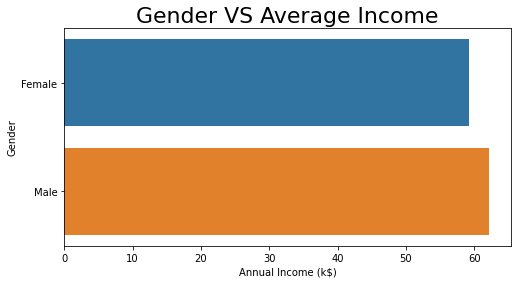

In [ ]:
gender_income = df.groupby('Gender')['Annual Income (k$)'].agg('mean').reset_index()
plt.figure(figsize=(8,4))
sns.barplot(data= gender_income, y='Gender', x='Annual Income (k$)')
plt.title("Gender VS Average Income", fontsize = 22)
plt.show()

*Males have more average Annual Income than Females*

**Descriptive Statistics**

In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Categorical Distribution**

In [ ]:
df.select_dtypes("object").describe()

,Gender
count,200
unique,2
top,Female
freq,112


**Gender Distribution**

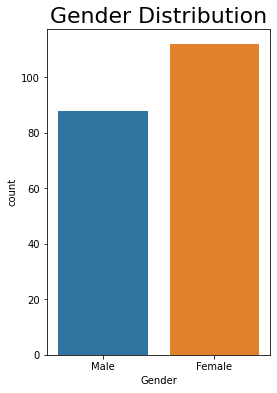

In [ ]:
plt.figure(figsize=(4,6))
sns.countplot(df['Gender'])
plt.title("Gender Distribution", fontsize = 22)
plt.show()

**Distribution of Annual Income & Age**

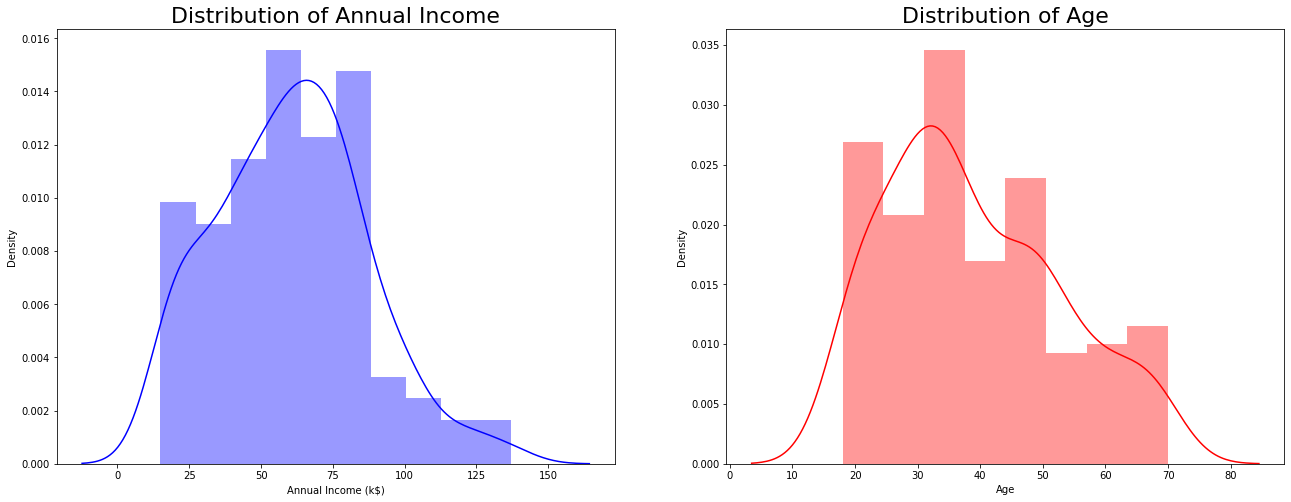

In [ ]:
plt.figure(figsize=(22,8))
plt.subplot(1,2,1)
sns.distplot(df['Annual Income (k$)'], color='b')
plt.title("Distribution of Annual Income", fontsize = 22)

plt.subplot(1,2,2)
sns.distplot(df['Age'], color='r')
plt.title("Distribution of Age", fontsize = 22)
plt.show()

*Most of the People earn 40k to 80k annually. Very few people earn more than 100k. And the least annual income is 20k*

*Most mall visitors are of age 20 to 35 years old. Senior citizens visits less to the mall.*

**Gender VS Spending Score**

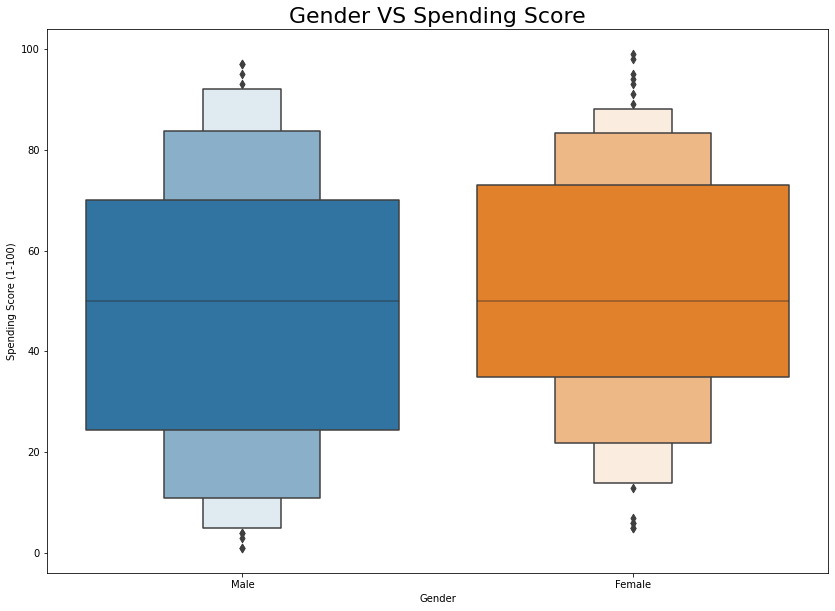

In [ ]:
plt.figure(figsize=(14,10))
sns.boxenplot(df['Gender'], df['Spending Score (1-100)'])
plt.title("Gender VS Spending Score", fontsize = 22)
plt.show()

*Females are Shopping Leaders. They have compratively high Spending Score than Males.*

**Age VS Annual Income & Spending Score**

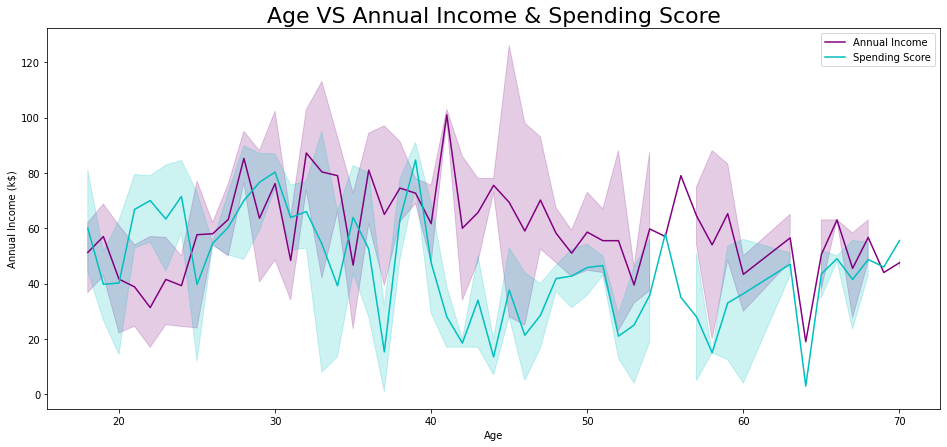

In [ ]:
plt.figure(figsize=(16, 7))
x = df['Age']
y = df['Annual Income (k$)']
z = df['Spending Score (1-100)']

sns.lineplot(x, y, color = 'purple', label="Annual Income")
sns.lineplot(x, z, color= 'c', label="Spending Score")
plt.title("Age VS Annual Income & Spending Score", fontsize= 22)
plt.legend()
plt.show()

***

## **Clustering**

Finding Clusters who relates to similar behaviour according to "Age, Annual Income & Spending Score"

In [ ]:
X = df.iloc[:,2:]

In [ ]:
X.shape

(200, 3)

**K-Means Clustering**

The Elbow method to find optimal number of Clusters.

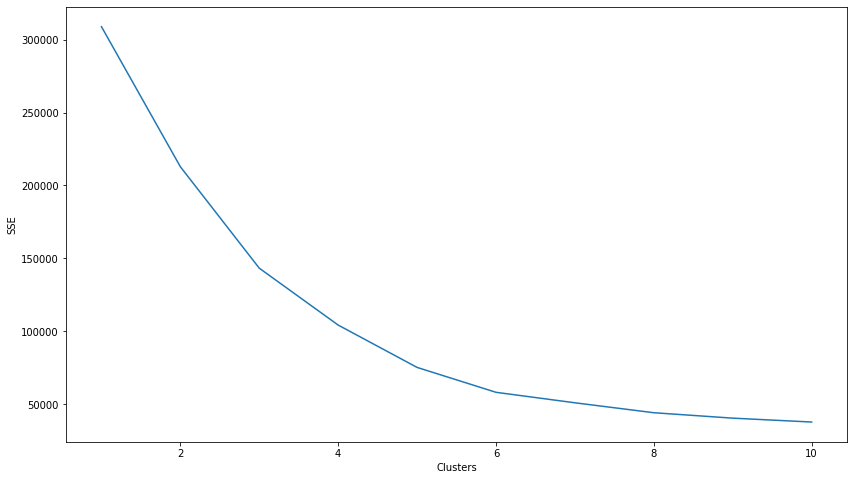

In [ ]:
from sklearn.cluster import KMeans
Inter = []
for i in range(1,11):
  model = KMeans(n_clusters = i)
  model.fit(X)
  Inter.append(model.inertia_)

# plotting the Elbow
plt.figure(figsize = (14, 8))
plt.plot(np.arange(1,11), Inter)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

*From the elbow curve it is clear that the optimum number of clusters i.e., n_clusters is 3.*

**Fitting the model on optimum Clusters**

In [ ]:
K_model = KMeans(n_clusters = 3)

In [ ]:
K_model.fit(X)

KMeans(n_clusters=3)

In [ ]:
clusters = K_model.labels_

Assigning the fitted Clusters to the X data to Visualize

In [ ]:
X = X.assign(cluster = clusters)
X.sample(10)

,Age,Annual Income (k$),Spending Score (1-100),cluster
138,19,74,10,2
116,63,65,43,1
54,50,43,45,1
35,21,33,81,1
103,26,62,55,1
115,19,65,50,1
38,36,37,26,1
88,34,58,60,1
8,64,19,3,1
4,31,17,40,1


**Visualizing the Clusters**

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X, x='Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color='cluster', opacity=0.7)

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))

***Finally, Successfully Segmented our Customers According to their Behaviors using Clustering Technique***